##  Import Required Libraries

In [35]:
from qdrant_client import QdrantClient, models
from dotenv import load_dotenv
import os

load_dotenv()

True

## Connect to Qdrant Cloud

In [36]:
client = QdrantClient(url=os.getenv("QDRANT_URL"), api_key=os.getenv("QDRANT_API_KEY"))

## Create a Collection

In [37]:
# Define the collection name
collection_name = "my_first_collection"

# Create the collection with specified vector parameters
client.create_collection(
    collection_name=collection_name,
    vectors_config=models.VectorParams(
        size=4,  # Dimensões do vector
        distance=models.Distance.COSINE  # Distance metric for similarity search
    )
)

True

## Verify Collection Creation

In [38]:
# Retrieve and display the list of collections
collections = client.get_collections()
print("Existing collections:", collections)

Existing collections: collections=[CollectionDescription(name='my_first_collection')]


## Insert Points into the Collection

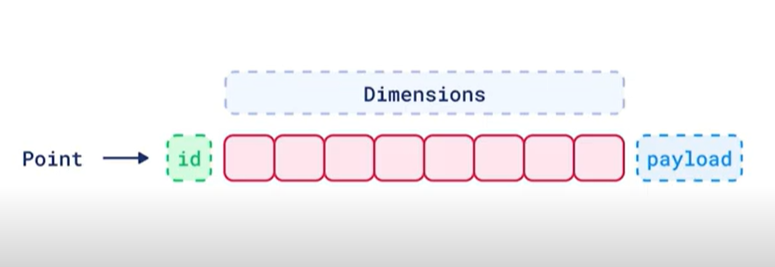

In [39]:
# Define the vectors to be inserted
points = [
    models.PointStruct(
        id=1,
        vector=[0.1, 0.2, 0.3, 0.4],  # 4D vector
        payload={"category": "example"}  # Metadata (optional)
    ),
    models.PointStruct(
        id=2,
        vector=[0.2, 0.3, 0.4, 0.5],
        payload={"category": "demo"}
    )
]

# Insert vectors into the collection
client.upsert(
    collection_name=collection_name,
    points=points
)

UpdateResult(operation_id=1, status=<UpdateStatus.COMPLETED: 'completed'>)

## Retrieve Collection Details

In [40]:
collection_info = client.get_collection(collection_name)
print("Collection info:", collection_info)

Collection info: status=<CollectionStatus.GREEN: 'green'> optimizer_status=<OptimizersStatusOneOf.OK: 'ok'> warnings=None indexed_vectors_count=0 points_count=2 segments_count=2 config=CollectionConfig(params=CollectionParams(vectors=VectorParams(size=4, distance=<Distance.COSINE: 'Cosine'>, hnsw_config=None, quantization_config=None, on_disk=None, datatype=None, multivector_config=None), shard_number=1, sharding_method=None, replication_factor=1, write_consistency_factor=1, read_fan_out_factor=None, on_disk_payload=True, sparse_vectors=None), hnsw_config=HnswConfig(m=16, ef_construct=100, full_scan_threshold=10000, max_indexing_threads=0, on_disk=False, payload_m=None, inline_storage=None), optimizer_config=OptimizersConfig(deleted_threshold=0.2, vacuum_min_vector_number=1000, default_segment_number=0, max_segment_size=None, memmap_threshold=None, indexing_threshold=10000, flush_interval_sec=5, max_optimization_threads=None), wal_config=WalConfig(wal_capacity_mb=32, wal_segments_ahead

## Run Your First Similarity Search

In [41]:
query_vector = [0.1, 0.3, 0.4, 0.9]

search_results = client.query_points(
    collection_name=collection_name,
    query=query_vector,
    limit=1  # Return the top 1 most similar vector
)

print("Search results:", search_results)

Search results: points=[ScoredPoint(id=1, version=1, score=0.9707563, payload={'category': 'example'}, vector=None, shard_key=None, order_value=None)]


## Creating Index

In [ ]:
from qdrant_client import models

client.create_payload_index(
    collection_name=collection_name,
    field_name="category",
    field_schema=models.PayloadSchemaType.KEYWORD,
)

UpdateResult(operation_id=3, status=<UpdateStatus.COMPLETED: 'completed'>)

Verificar se o índice foi criado com sucesso rodando novamente:

In [46]:
print(client.get_collection(collection_name).payload_schema)

{'category': PayloadIndexInfo(data_type=<PayloadSchemaType.KEYWORD: 'keyword'>, params=None, points=2)}


## Filter by metadata

In [45]:
search_filter = models.Filter(
    must=[
        models.FieldCondition(
            key="category",
            match=models.MatchValue(value="example"),
        )
    ]
)

search_results = client.query_points(
    collection_name=collection_name,
    query=query_vector,
    query_filter=search_filter,
    limit=1,
)

print("Search results:", search_results)

Search results: points=[ScoredPoint(id=1, version=1, score=0.9707563, payload={'category': 'example'}, vector=None, shard_key=None, order_value=None)]
